In [24]:
import pandas as pd
import plotly.express as px
csv_file_path = './archive/India_COVID19.csv'

df = pd.read_csv(csv_file_path)

 Data Distribution using Bubble Chart

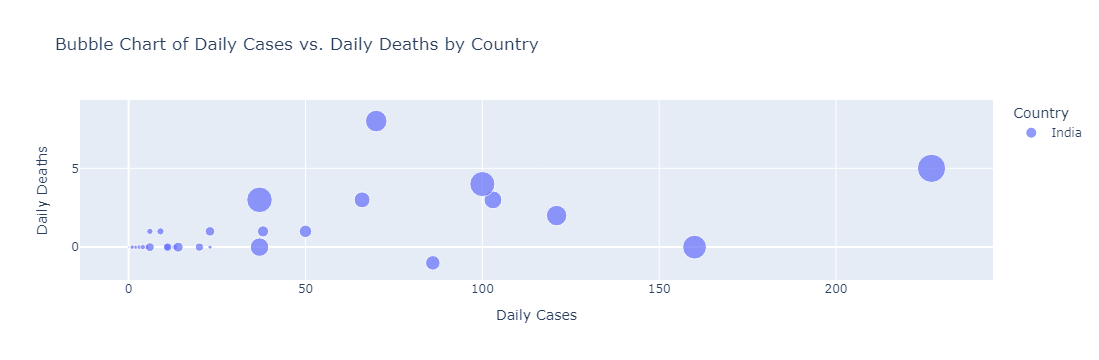

In [25]:
# Bubble Chart - Daily Cases vs. Daily Deaths
fig_bubble = px.scatter(df, x='Daily_cases', y='Daily_death', size='Cumulative_cases', color='Country',
                        labels={'Daily_cases': 'Daily Cases', 'Daily_death': 'Daily Deaths'},
                        title='Bubble Chart of Daily Cases vs. Daily Deaths by Country')

# Show the bubble chart
fig_bubble.show()

Data Distribution using Histogram

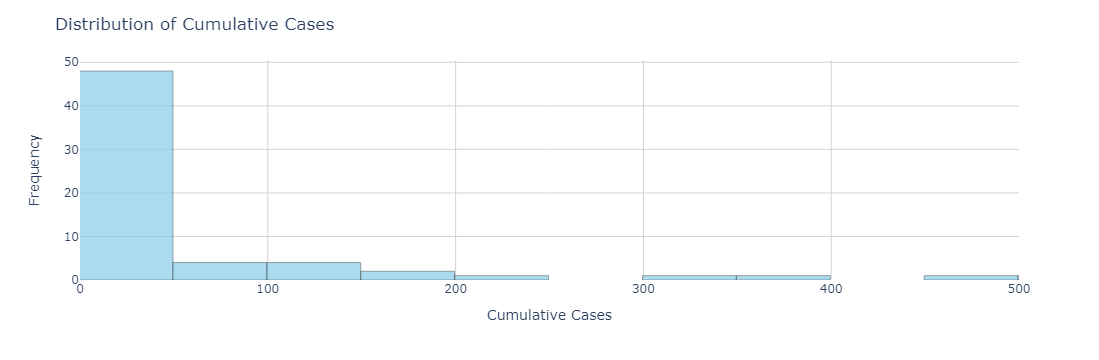

In [26]:
fig_dist = px.histogram(df, x='Cumulative_cases', color_discrete_sequence=['skyblue'], opacity=0.7)
fig_dist.update_layout(
    title='Distribution of Cumulative Cases',
    xaxis_title='Cumulative Cases',
    yaxis_title='Frequency'
)

fig_dist.update_traces(xbins=dict(size=50))  # You can adjust the bin size as needed

fig_dist.update_layout(xaxis_range=[0, 500])  # Set the desired x-axis range

fig_dist.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent plot area
    xaxis=dict(showgrid=True, gridcolor='lightgray'),  # Add grid lines
    yaxis=dict(showgrid=True, gridcolor='lightgray')  # Add grid lines
)


fig_dist.update_traces(marker=dict(line=dict(color='black', width=0.5)))  # Add black border to bars
fig_dist.update_traces(hovertemplate='Cumulative Cases: %{x}<br>Frequency: %{y}')



fig_dist.show()

Data Distribution using Bar Graph

In [27]:
import pandas as pd
import os

# Path to the directory containing CSV files
csv_directory = './archive'

# List to store dataframes from each CSV
dfs = []

# Loop through files in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(csv_directory, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Merge dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)


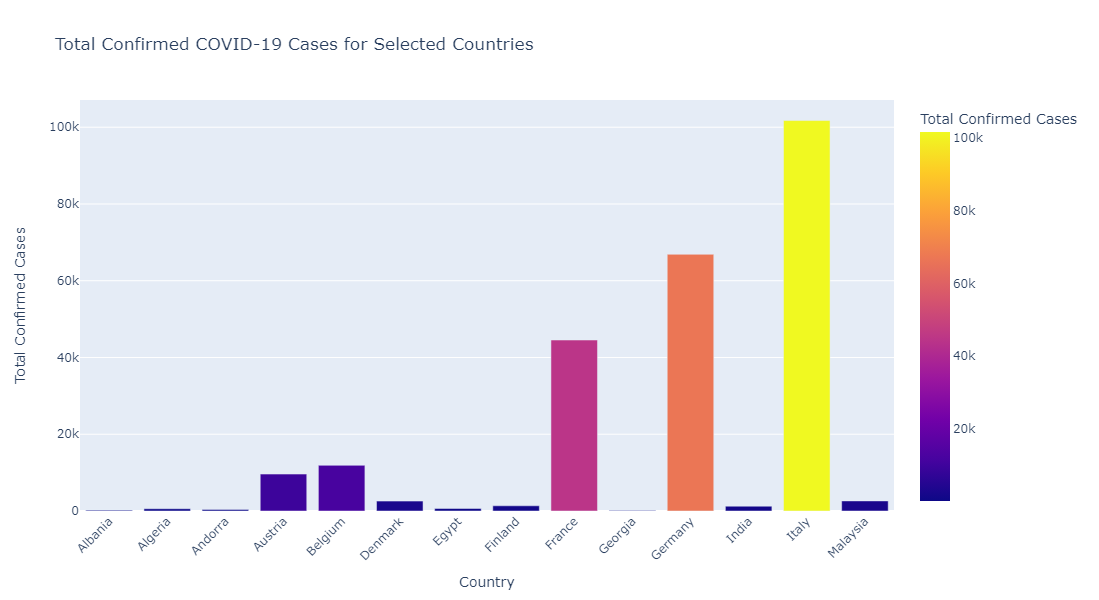

In [28]:
import pandas as pd
import plotly.express as px

# List of countries you want to include in the plot
selected_countries = ['Albania', 'Algeria', 'Andorra','Denmark','Egypt','France','Georgia','Italy','India','Finland','Austria','Malaysia','Belgium','Germany']

# Filter the data for selected countries
selected_data = merged_df[merged_df['Country'].isin(selected_countries)]

# Grouping and aggregating data by Country to get the total confirmed cases
grouped_data = selected_data.groupby(['Country']).agg({'Cumulative_cases': 'max'}).reset_index()

# Create a Plotly figure
fig = px.bar(grouped_data, x='Country', y='Cumulative_cases',
             color='Cumulative_cases',
             labels={'Cumulative_cases': 'Total Confirmed Cases'},
             title='Total Confirmed COVID-19 Cases for Selected Countries',
             height=600)

# Adjust figure width and x-axis label rotation
fig.update_layout(width=800, xaxis_tickangle=-45)  

# Show the plot
fig.show()


Data Distribution using Scatter Plot

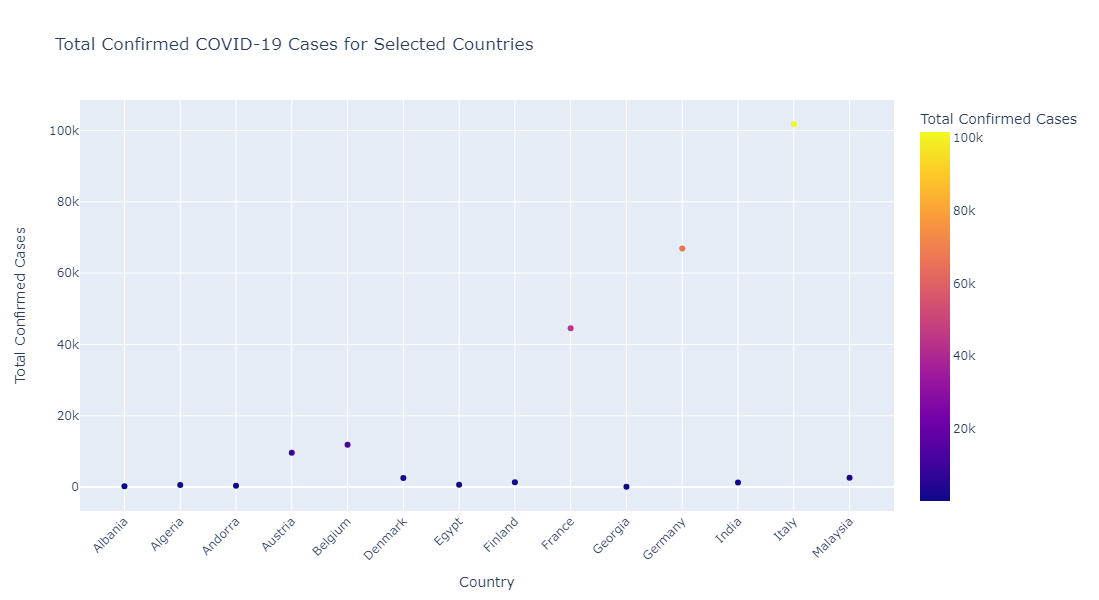

In [29]:
# Create a scatter plot using Plotly Express
fig = px.scatter(grouped_data, x='Country', y='Cumulative_cases',
                 color='Cumulative_cases',
                 labels={'Cumulative_cases': 'Total Confirmed Cases'},
                 title='Total Confirmed COVID-19 Cases for Selected Countries',
                 height=600)

# Adjust figure width and x-axis label rotation
fig.update_layout(width=900, xaxis_tickangle=-45)  

# Show the plot
fig.show()


In [30]:
print(merged_df)


             Date   State      Country  Cumulative_cases  Cumulative_death  \
0      22-01-2020     NaN      Albania               0.0               0.0   
1      23-01-2020     NaN      Albania               0.0               0.0   
2      24-01-2020     NaN      Albania               0.0               0.0   
3      25-01-2020     NaN      Albania               0.0               0.0   
4      26-01-2020     NaN      Albania               0.0               0.0   
...           ...     ...          ...               ...               ...   
61848  31-01-2020     NaN       Gambia               0.0               0.0   
61849  31-01-2020   Aruba  Netherlands               0.0               0.0   
61850  31-01-2020  Fujian        China             120.0               0.0   
61851  31-03-2020     NaN  Afghanistan             196.0               4.0   
61852  31-03-2020     NaN  Afghanistan             196.0               4.0   

       Daily_cases  Daily_death  Latitude  Longitude  Temperatu

In [31]:
#Reading the temperature data file
temperature_data = pd.read_csv('./archive/India_COVID19.csv')

#Viewing the dataset
temperature_data.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,India,0,0,0,0,21,78,26.28,...,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
1,23-01-2020,NaN,India,0,0,0,0,21,78,27.11,...,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
2,24-01-2020,NaN,India,0,0,0,0,21,78,25.22,...,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
3,25-01-2020,NaN,India,0,0,0,0,21,78,25.33,...,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN
4,26-01-2020,NaN,India,0,0,0,0,21,78,24.94,...,0.175,0.0,87.54,106.89,67.8,70.5,47951,NaN,"17,423",NaN


In [32]:
#Checking the dependence of Temperature on Confirmed COVID-19 Cases

unique_temp = temperature_data['Temperature'].unique()
confirmed_cases = []
deaths = []

for temp in unique_temp:
    temp_wise = temperature_data['Temperature'] == temp
    test_data = temperature_data[temp_wise]
    
    confirmed_cases.append(test_data['Daily_cases'].sum())
    deaths.append(test_data['Daily_death'].sum())
    
#Converting the lists to a pandas dataframe.

temperature_dataset = {'Temperature' : unique_temp, 'Confirmed' : confirmed_cases, 'Deaths' : deaths}
temperature_dataset = pd.DataFrame(temperature_dataset)

Data Distribution using Box Plot

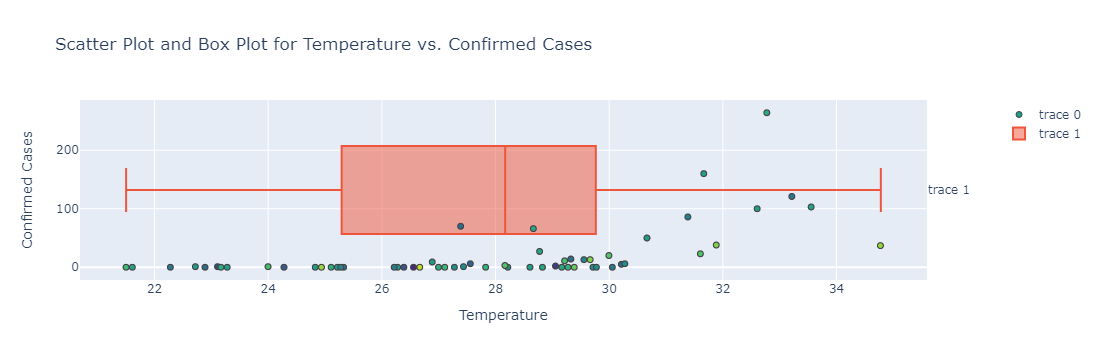

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Assuming temperature_dataset is your DataFrame

# Create subplots with one trace on the primary y-axis (scatter plot) and another on the secondary y-axis (box plot)
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add scatter plot to the primary y-axis
fig.add_trace(go.Scattergl(x=temperature_dataset['Temperature'], y=temperature_dataset['Confirmed'], mode='markers',
                           marker=dict(color=np.random.randn(10000), colorscale='Viridis', line_width=1)),
              secondary_y=False)

# Add box plot to the secondary y-axis
fig.add_trace(go.Box(x=temperature_dataset['Temperature']), secondary_y=True)

# Update layout
fig.update_layout(title='Scatter Plot and Box Plot for Temperature vs. Confirmed Cases',
                  xaxis_title='Temperature',
                  yaxis_title='Confirmed Cases')

# Show the plot
fig.show()


In [34]:
import pandas as pd
import plotly.express as px
csv_file_path = './archive/Albania_COVID19.csv'

df = pd.read_csv(csv_file_path)


# Display the DataFrame
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Available Beds/1000,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,Albania,0,0,0,0,41.1533,20.1683,5.72,...,0.725,0.0,7.02,17.04,76,81.6,1526,5415,5927,Not Reported
1,23-01-2020,NaN,Albania,0,0,0,0,41.1533,20.1683,6.72,...,0.725,0.0,7.02,17.04,76,81.6,1526,5415,5927,Not Reported
2,24-01-2020,NaN,Albania,0,0,0,0,41.1533,20.1683,8.17,...,0.725,0.0,7.02,17.04,76,81.6,1526,5415,5927,Not Reported
3,25-01-2020,NaN,Albania,0,0,0,0,41.1533,20.1683,10.83,...,0.725,0.0,7.02,17.04,76,81.6,1526,5415,5927,Not Reported
4,26-01-2020,NaN,Albania,0,0,0,0,41.1533,20.1683,11.39,...,0.725,0.0,7.02,17.04,76,81.6,1526,5415,5927,Not Reported


Data Distribution using Line Chart

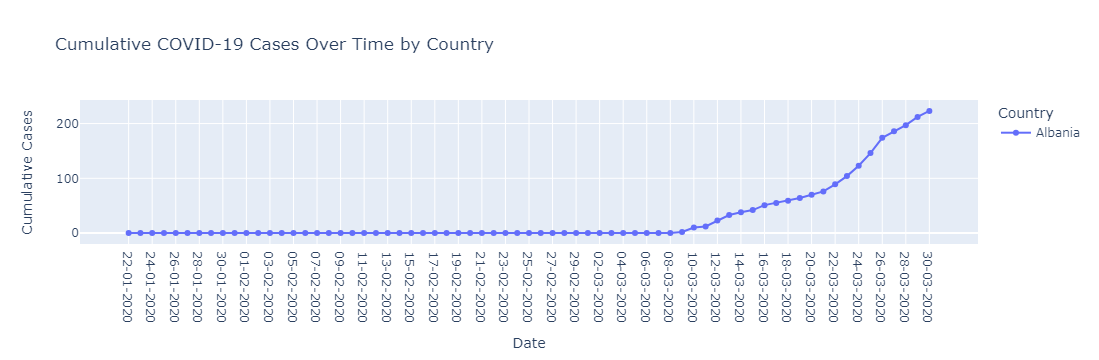

In [35]:
# Line Chart - Cumulative Cases Over Time with Markers
fig_line = px.line(df, x='Date', y='Cumulative_cases', color='Country',
                   labels={'Cumulative_cases': 'Cumulative Cases'},
                   title='Cumulative COVID-19 Cases Over Time by Country',
                   markers=True)  # Set markers to True to display data points

# Show the line chart
fig_line.show()


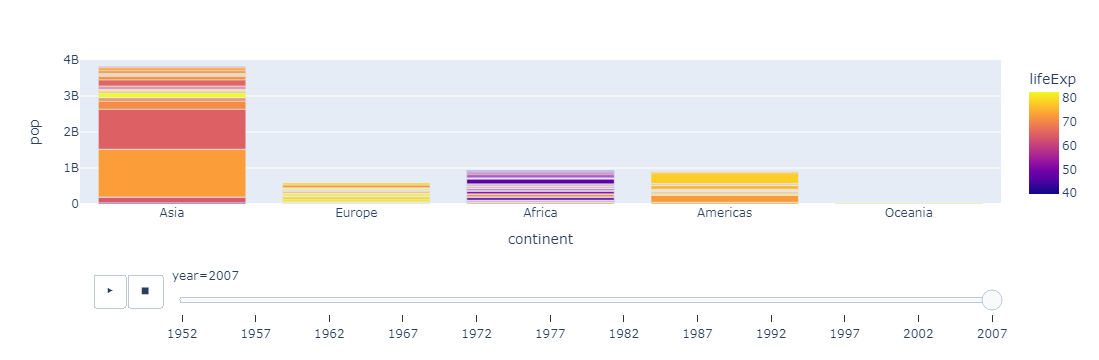

In [36]:
import plotly.express as px 

df1 = px.data.gapminder() 
df1.head(15) 

fig = px.bar(df1, 
			x ="continent", 
			y ="pop", 
			color ='lifeExp', 
			animation_frame ='year', 
			hover_name ='country', 
			range_y =[0, 4000000000]) 
fig.show()


Data Distribution using Heatmap

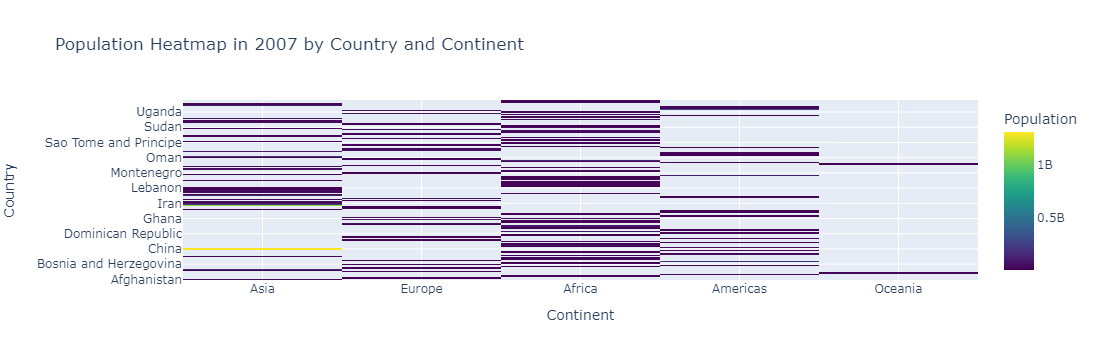

In [37]:
import plotly.express as px
import plotly.graph_objects as go

df1 = px.data.gapminder()

# Filter the data for the year 2007
df_2007 = df1[df1['year'] == 2007]

# Create a heatmap using go.Heatmap
fig_heatmap = go.Figure(go.Heatmap(
    x=df_2007['continent'],
    y=df_2007['country'],
    z=df_2007['pop'],
    colorscale='Viridis',  # You can change the colorscale as per your preference
    colorbar_title='Population'
))

# Customize the layout
fig_heatmap.update_layout(
    title='Population Heatmap in 2007 by Country and Continent',
    xaxis_title='Continent',
    yaxis_title='Country'
)

# Show the heatmap
fig_heatmap.show()
